# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [256]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
#import missingno as msn
# Create a new dataframe from your CSV
rats = pd.read_csv('Rat_Sightings.csv')

In [257]:
# Print out any information you need to understand your dataframe
print(rats.columns.tolist())


['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name', 'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2', 'Intersection Street 1', 'Intersection Street 2', 'Address Type', 'City', 'Landmark', 'Facility Type', 'Status', 'Due Date', 'Resolution Action Updated Date', 'Community Board', 'Borough', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough', 'School Name', 'School Number', 'School Region', 'School Code', 'School Phone Number', 'School Address', 'School City', 'School State', 'School Zip', 'School Not Found', 'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name', 'Latitude', 'Longitude', 'Location']


In [258]:
rats.describe()
rats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101914 entries, 0 to 101913
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      101914 non-null  int64  
 1   Created Date                    101914 non-null  object 
 2   Closed Date                     90983 non-null   object 
 3   Agency                          101914 non-null  object 
 4   Agency Name                     101914 non-null  object 
 5   Complaint Type                  101914 non-null  object 
 6   Descriptor                      101914 non-null  object 
 7   Location Type                   101908 non-null  object 
 8   Incident Zip                    101578 non-null  float64
 9   Incident Address                92840 non-null   object 
 10  Street Name                     92839 non-null   object 
 11  Cross Street 1                  85257 non-null   object 
 12  Cross Street 2  

Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

In [259]:
# Plot a heatmap of any missing data
rats_A = pd.DataFrame(rats[['Unique Key', 'Created Date', 'Closed Date', 'City']])

In [260]:
# Try out a missing data percentage list! 
print(rats_A)

        Unique Key            Created Date             Closed Date  \
0         31464015  09/04/2015 12:00:00 AM  09/18/2015 12:00:00 AM   
1         31464024  09/04/2015 12:00:00 AM  10/28/2015 12:00:00 AM   
2         31464025  09/04/2015 12:00:00 AM                     NaN   
3         31464026  09/04/2015 12:00:00 AM  09/14/2015 12:00:00 AM   
4         31464027  09/04/2015 12:00:00 AM  09/22/2015 12:00:00 AM   
...            ...                     ...                     ...   
101909    35494908  02/15/2017 12:00:00 AM  01/31/2017 12:00:00 AM   
101910    35494944  02/14/2017 12:00:00 AM  02/23/2017 12:00:00 AM   
101911    35494945  02/14/2017 12:00:00 AM  02/16/2017 12:00:00 AM   
101912    35494970  02/14/2017 12:00:00 AM  01/17/2017 12:00:00 AM   
101913    35502334  02/15/2017 04:39:49 AM                     NaN   

                 City  
0            NEW YORK  
1       STATEN ISLAND  
2       STATEN ISLAND  
3            BROOKLYN  
4               BRONX  
...            

In [261]:
# Plot a missing data histogram


Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

In [262]:
# Handle any missing data in your dataframe.
rats_A.dropna(subset=['Unique Key', 'Created Date', 'Closed Date', 'City'], inplace=True)
rats_A.drop_duplicates(inplace=True)
print(rats_A)

        Unique Key            Created Date             Closed Date  \
0         31464015  09/04/2015 12:00:00 AM  09/18/2015 12:00:00 AM   
1         31464024  09/04/2015 12:00:00 AM  10/28/2015 12:00:00 AM   
3         31464026  09/04/2015 12:00:00 AM  09/14/2015 12:00:00 AM   
4         31464027  09/04/2015 12:00:00 AM  09/22/2015 12:00:00 AM   
5         31464188  09/04/2015 12:00:00 AM  09/22/2015 12:00:00 AM   
...            ...                     ...                     ...   
101908    35494905  02/14/2017 12:00:00 AM  02/22/2017 12:00:00 AM   
101909    35494908  02/15/2017 12:00:00 AM  01/31/2017 12:00:00 AM   
101910    35494944  02/14/2017 12:00:00 AM  02/23/2017 12:00:00 AM   
101911    35494945  02/14/2017 12:00:00 AM  02/16/2017 12:00:00 AM   
101912    35494970  02/14/2017 12:00:00 AM  01/17/2017 12:00:00 AM   

                 City  
0            NEW YORK  
1       STATEN ISLAND  
3            BROOKLYN  
4               BRONX  
5            BROOKLYN  
...            

## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

In [263]:
# Plot a histogram to see if there are any outliers.


In [264]:
# Use the describe() method
rats_A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90698 entries, 0 to 101912
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unique Key    90698 non-null  int64 
 1   Created Date  90698 non-null  object
 2   Closed Date   90698 non-null  object
 3   City          90698 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.5+ MB


<AxesSubplot:>

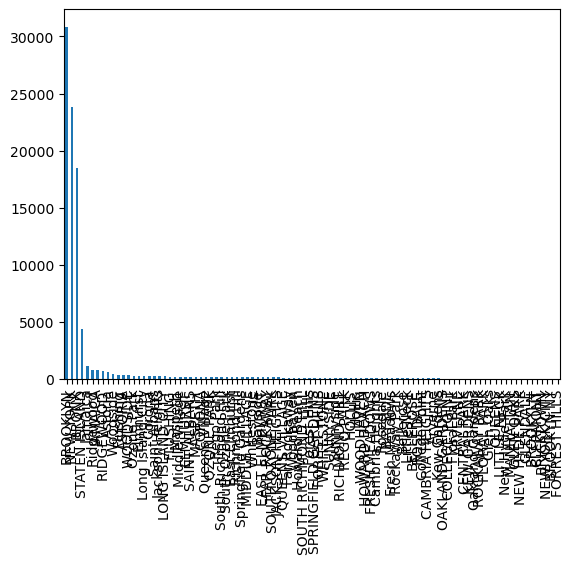

In [265]:
# Plot a bar chart
rats_A['City'].value_counts().plot.bar()

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

In [266]:
# Handle any outliers in your dataframe

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [267]:
# Look for any irrelevant data in the dataframe. How will you handle it?

In [268]:
# Look for duplicates. How will you handle any duplicates?

In [269]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?

## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [270]:
# Try to convert all the strings in a column to lower or upper case. 